In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [25]:
# Création des dataframes
devices_df = pd.read_excel("./clean_data/appareil_finaL.xlsx")

time_df = pd.read_excel("./clean_data/date_final.xlsx")

pages_df = pd.read_excel("./clean_data/page_final.xlsx")

keywords_df = pd.read_excel("./clean_data/EV USA Keywords - SEMrush.xlsx")


In [26]:

def clean_percentage(value):
    """Convertit les pourcentages en format string vers des floats"""
    if isinstance(value, str) and '%' in value:
        return float(value.strip('%').replace(',', '.'))
    return value

def clean_numeric(value):
    """Convertit les nombres en format string avec virgules vers des floats"""
    if isinstance(value, str):
        return float(value.replace(',', ''))
    return value



def analyze_seo_data(devices_df, time_df, pages_df):
    """Fonction principale d'analyse des données SEO"""
    
    # Nettoyage des données
    for df in [devices_df, time_df, pages_df]:
        df['CTR'] = df['CTR'].apply(clean_percentage)
        df['Impressions'] = df['Impressions'].apply(clean_numeric)
    
    results = {
        'device_analysis': analyze_devices(devices_df),
        'time_analysis': analyze_time_series(time_df),
        'page_analysis': analyze_pages(pages_df)
    }
    
    return results

def analyze_devices(df):
    """Analyse des performances par appareil"""
    total_clicks = df['Clics'].sum()
    total_impressions = df['Impressions'].sum()
    
    device_stats = {
        'total_clicks': total_clicks,
        'total_impressions': total_impressions,
        'overall_ctr': (total_clicks / total_impressions) * 100,
        'device_distribution': df.set_index('Appareil')['Clics'].to_dict(),
        'best_performing_device': df.loc[df['CTR'].idxmax(), 'Appareil'],
        'worst_performing_device': df.loc[df['CTR'].idxmin(), 'Appareil']
    }
    
    return device_stats

def analyze_time_series(df):
    """Analyse des tendances temporelles"""
    df['Date'] = pd.to_datetime(df['Date'])
    
    time_stats = {
        'daily_avg_clicks': df['Clics'].mean(),
        'daily_avg_impressions': df['Impressions'].mean(),
        'trend': {
            'clicks': df['Clics'].diff().mean(),
            'impressions': df['Impressions'].diff().mean(),
            'position': df['Position'].diff().mean()
        }
    }
    
    return time_stats

def analyze_pages(df):
    """Analyse des performances par page"""
    df['Efficacité'] = df['Clics'] * (1 / df['Position'])
    
    page_stats = {
        'best_performing_pages': df.nlargest(2, 'Efficacité')['Pages les plus populaires'].tolist(),
        'avg_position': df['Position'].mean(),
        'total_traffic': {
            'clicks': df['Clics'].sum(),
            'impressions': df['Impressions'].sum()
        }
    }
    
    return page_stats

# Exécution de l'analyse
results = analyze_seo_data(devices_df, time_df, pages_df)

# Création d'un rapport détaillé
def generate_report(results):
    """Génère un rapport détaillé des analyses"""
    report = f"""
Rapport d'Analyse SEO

1. Analyse par Appareil
----------------------
Total des clics: {results['device_analysis']['total_clicks']}
Total des impressions: {results['device_analysis']['total_impressions']}
CTR global: {results['device_analysis']['overall_ctr']:.2f}%
Meilleur appareil: {results['device_analysis']['best_performing_device']}
Appareil le moins performant: {results['device_analysis']['worst_performing_device']}

2. Analyse Temporelle
--------------------
Moyenne quotidienne des clics: {results['time_analysis']['daily_avg_clicks']:.2f}
Moyenne quotidienne des impressions: {results['time_analysis']['daily_avg_impressions']:.2f}
Tendance des clics: {'↑' if results['time_analysis']['trend']['clicks'] > 0 else '↓'} {abs(results['time_analysis']['trend']['clicks']):.2f}
Tendance de la position: {'↑' if results['time_analysis']['trend']['position'] < 0 else '↓'} {abs(results['time_analysis']['trend']['position']):.2f}

3. Analyse des Pages
-------------------
Meilleures pages:
1. {results['page_analysis']['best_performing_pages'][0]}
2. {results['page_analysis']['best_performing_pages'][1]}
Position moyenne: {results['page_analysis']['avg_position']:.2f}
Trafic total: {results['page_analysis']['total_traffic']['clicks']} clics
"""
    return report

# Génération et affichage du rapport
print(generate_report(results))


Rapport d'Analyse SEO

1. Analyse par Appareil
----------------------
Total des clics: 676971
Total des impressions: 38572690
CTR global: 1.76%
Meilleur appareil: Tablette
Appareil le moins performant: Ordinateur

2. Analyse Temporelle
--------------------
Moyenne quotidienne des clics: 1471.68
Moyenne quotidienne des impressions: 83763.16
Tendance des clics: ↑ 16.41
Tendance de la position: ↑ 0.00

3. Analyse des Pages
-------------------
Meilleures pages:
1. https://www.michelinman.com/
2. https://www.michelinman.com/auto/tires/michelin-defender-ltx-m-s
Position moyenne: 23.82
Trafic total: 636960 clics




Rapport d'Analyse SEO - Focus sur les Mots-clés

1. Mots-clés les Plus Prometteurs
--------------------------------
1. tires for tesla
2. tires tesla

2. Recommandations SEO
---------------------
- Prioritiser le mot-clé 'tires for tesla' qui offre le meilleur équilibre entre volume de recherche (9900.0) et difficulté (31)
- Se concentrer sur les mots-clés à fort volume : michelin ev tire, michelin ev tires, ev tire, ev tires, tesla model s tires, tesla 3 tires, tesla model y tires, tesla tires model s, tires for tesla model 3, tesla model 3 tire, tesla model 3 tires, tesla tires, tesla model y tire, tesla tire, tesla tires model 3, tesla tires model y, tires for tesla, tires tesla, best ev tires, tesla model y performance tires, best tires for tesla model y, tire tesla, tesla model 3 tire size, tesla model y tire size, tesla model 3 performance tires, tesla model s plaid tires, how long do tesla tires last, tesla tire warranty, tesla snow tires, tesla tire pressure, best tires for te

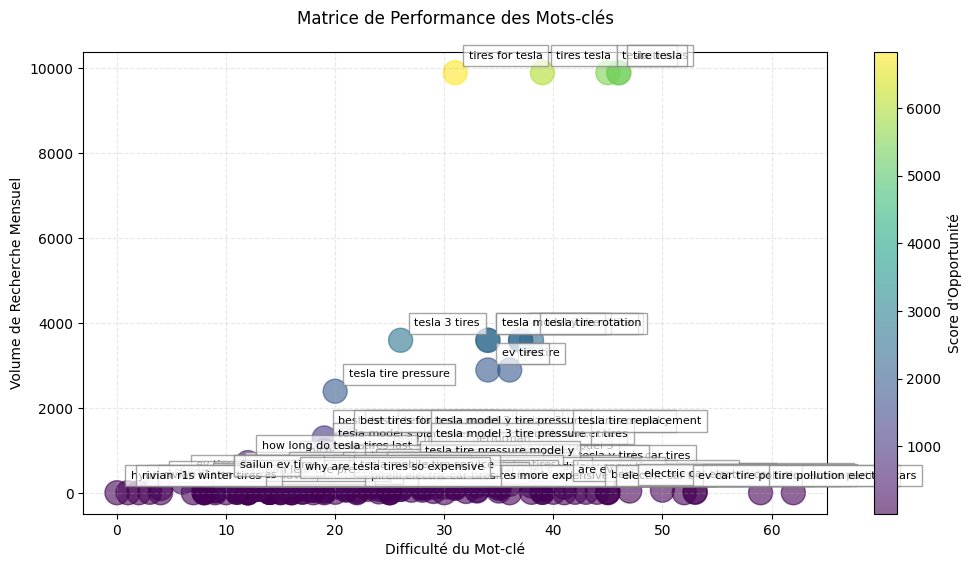

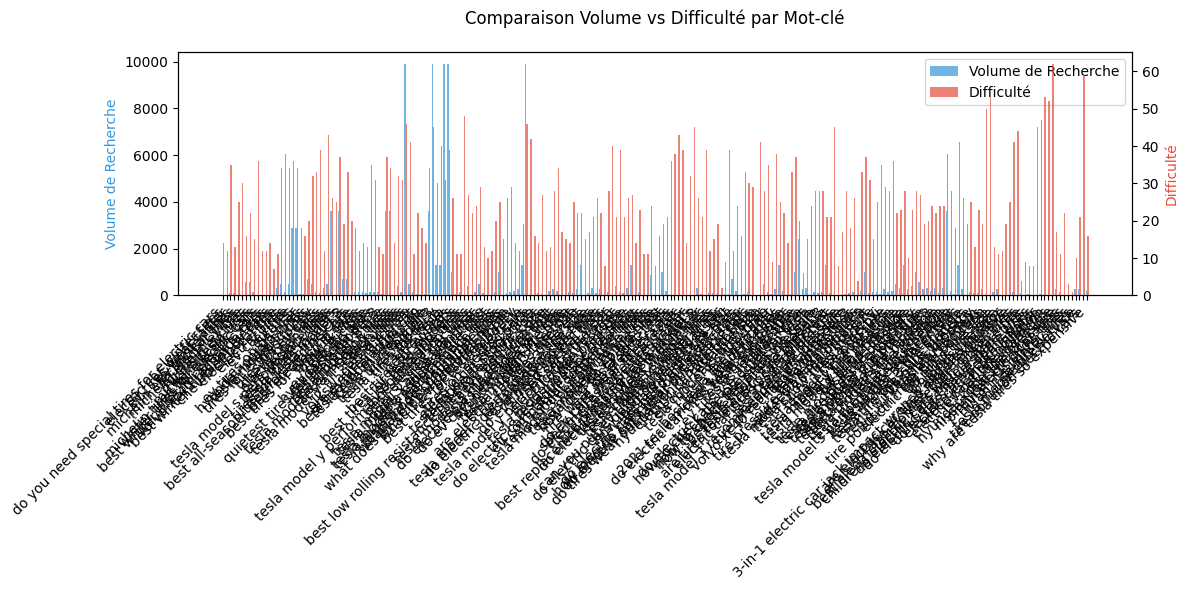

In [28]:


# Configuration matplotlib pour le français
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

def analyze_keywords(df):
    """Analyse approfondie des mots-clés avec calcul des métriques importantes"""
    # Calcul du score d'opportunité basé sur le volume et la difficulté
    df['Opportunity_Score'] = (df['Search Volume'] * (100 - df['Keyword Difficulty'])) / 100
    
    # Normalisation des volumes pour une meilleure visualisation
    df['Volume_Normalized'] = (df['Search Volume'] - df['Search Volume'].min()) / (df['Search Volume'].max() - df['Search Volume'].min())
    
    return df

def create_keyword_visualizations(df):
    """Création des visualisations personnalisées avec matplotlib"""
    
    # Configuration des couleurs et du style
    colors = ['#2ecc71', '#3498db', '#e74c3c']
    
    # Figure 1: Matrice de performance des mots-clés
    fig1 = plt.figure(figsize=(12, 6))
    ax1 = fig1.add_subplot(111)
    
    # Création du scatter plot
    scatter = ax1.scatter(df['Keyword Difficulty'], 
                         df['Search Volume'],
                         s=300,  # Taille des points
                         c=df['Opportunity_Score'],
                         cmap='viridis',
                         alpha=0.6)
    
    # Ajout des labels pour chaque point
    for i, keyword in enumerate(df['Keyword']):
        ax1.annotate(keyword,
                    (df['Keyword Difficulty'].iloc[i], df['Search Volume'].iloc[i]),
                    xytext=(10, 10),
                    textcoords='offset points',
                    fontsize=8,
                    bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7))
    
    # Personnalisation du graphique
    ax1.set_xlabel('Difficulté du Mot-clé', fontsize=10)
    ax1.set_ylabel('Volume de Recherche Mensuel', fontsize=10)
    ax1.set_title('Matrice de Performance des Mots-clés', fontsize=12, pad=20)
    
    # Ajout d'une barre de couleur
    cbar = plt.colorbar(scatter)
    cbar.set_label('Score d\'Opportunité', fontsize=10)
    
    # Ajout d'une grille en arrière-plan
    ax1.grid(True, linestyle='--', alpha=0.3)
    
    # Figure 2: Comparaison des métriques
    fig2 = plt.figure(figsize=(12, 6))
    ax2 = fig2.add_subplot(111)
    
    # Position des barres
    x = np.arange(len(df['Keyword']))
    width = 0.35
    
    # Création des barres
    volume_bars = ax2.bar(x - width/2, df['Search Volume'], width, 
                         label='Volume de Recherche',
                         color='#3498db',
                         alpha=0.7)
    
    # Axe secondaire pour la difficulté
    ax2_twin = ax2.twinx()
    difficulty_bars = ax2_twin.bar(x + width/2, df['Keyword Difficulty'], width,
                                 label='Difficulté',
                                 color='#e74c3c',
                                 alpha=0.7)
    
    # Personnalisation des axes et labels
    ax2.set_ylabel('Volume de Recherche', color='#3498db', fontsize=10)
    ax2_twin.set_ylabel('Difficulté', color='#e74c3c', fontsize=10)
    
    # Configuration des ticks de l'axe x
    ax2.set_xticks(x)
    ax2.set_xticklabels(df['Keyword'], rotation=45, ha='right')
    
    # Ajout du titre
    ax2.set_title('Comparaison Volume vs Difficulté par Mot-clé', fontsize=12, pad=20)
    
    # Ajout d'une légende combinée
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, 
              loc='upper right',
              bbox_to_anchor=(1, 1),
              bbox_transform=ax2.transAxes)
    
    # Ajustement du layout
    plt.tight_layout()
    
    return fig1, fig2

def generate_seo_recommendations(keywords_df, results):
    """Génération de recommandations SEO basées sur l'analyse des données"""
    recommendations = []
    
    # Analyse des opportunités de mots-clés
    best_opportunity = keywords_df.loc[keywords_df['Opportunity_Score'].idxmax()]
    recommendations.append(
        f"Prioritiser le mot-clé '{best_opportunity['Keyword']}' qui offre le meilleur équilibre "
        f"entre volume de recherche ({best_opportunity['Search Volume']}) et "
        f"difficulté ({best_opportunity['Keyword Difficulty']})"
    )
    
    # Analyse des tendances de recherche
    high_volume_keywords = keywords_df[keywords_df['Search Volume'] > keywords_df['Search Volume'].mean()]
    if not high_volume_keywords.empty:
        recommendations.append(
            "Se concentrer sur les mots-clés à fort volume : " + 
            ", ".join(high_volume_keywords['Keyword'].tolist())
        )
    
    # Recommandations basées sur la difficulté
    easy_keywords = keywords_df[keywords_df['Keyword Difficulty'] < 20]
    if not easy_keywords.empty:
        recommendations.append(
            "Exploiter les opportunités faciles avec les mots-clés de faible difficulté : " +
            ", ".join(easy_keywords['Keyword'].tolist())
        )
    
    return recommendations

# Mise à jour de la fonction principale
def analyze_seo_data(keywords_df):
    """Fonction principale d'analyse SEO focalisée sur les mots-clés"""
    # Analyse des mots-clés
    keywords_analyzed = analyze_keywords(keywords_df)
    
    results = {
        'keyword_analysis': {
            'opportunity_scores': keywords_analyzed['Opportunity_Score'].to_dict(),
            'best_keywords': keywords_analyzed.nlargest(2, 'Opportunity_Score')['Keyword'].tolist()
        }
    }
    
    # Génération des recommandations
    results['recommendations'] = generate_seo_recommendations(keywords_analyzed, results)
    
    return results, keywords_analyzed

# Exécution de l'analyse
results, analyzed_keywords = analyze_seo_data(keywords_df)

# Création des visualisations
fig1, fig2 = create_keyword_visualizations(analyzed_keywords)

# Génération du rapport
def generate_keyword_report(results):
    """Génère un rapport détaillé sur l'analyse des mots-clés"""
    report = f"""
Rapport d'Analyse SEO - Focus sur les Mots-clés

1. Mots-clés les Plus Prometteurs
--------------------------------
1. {results['keyword_analysis']['best_keywords'][0]}
2. {results['keyword_analysis']['best_keywords'][1]}

2. Recommandations SEO
---------------------
{chr(10).join('- ' + rec for rec in results['recommendations'])}

3. Scores d'Opportunité
----------------------
{chr(10).join(f'- {key}: {value:.2f}' for key, value in results['keyword_analysis']['opportunity_scores'].items())}
"""
    return report

# Affichage du rapport
print(generate_keyword_report(results))


Rapport d'Analyse - Appareils

1. Métriques Globales
---------------------
Nombre total de clics: 165
Nombre total d'impressions: 24850.0
CTR moyen: 0.86%
Position moyenne: 13.73

2. Points Clés
-------------

- Meilleur appareil: Tablette
  CTR: 1.19%
  Position: 4.39
- Distribution des clics: Ordinateur: 91 clics, Mobile: 73 clics, Tablette: 1 clics



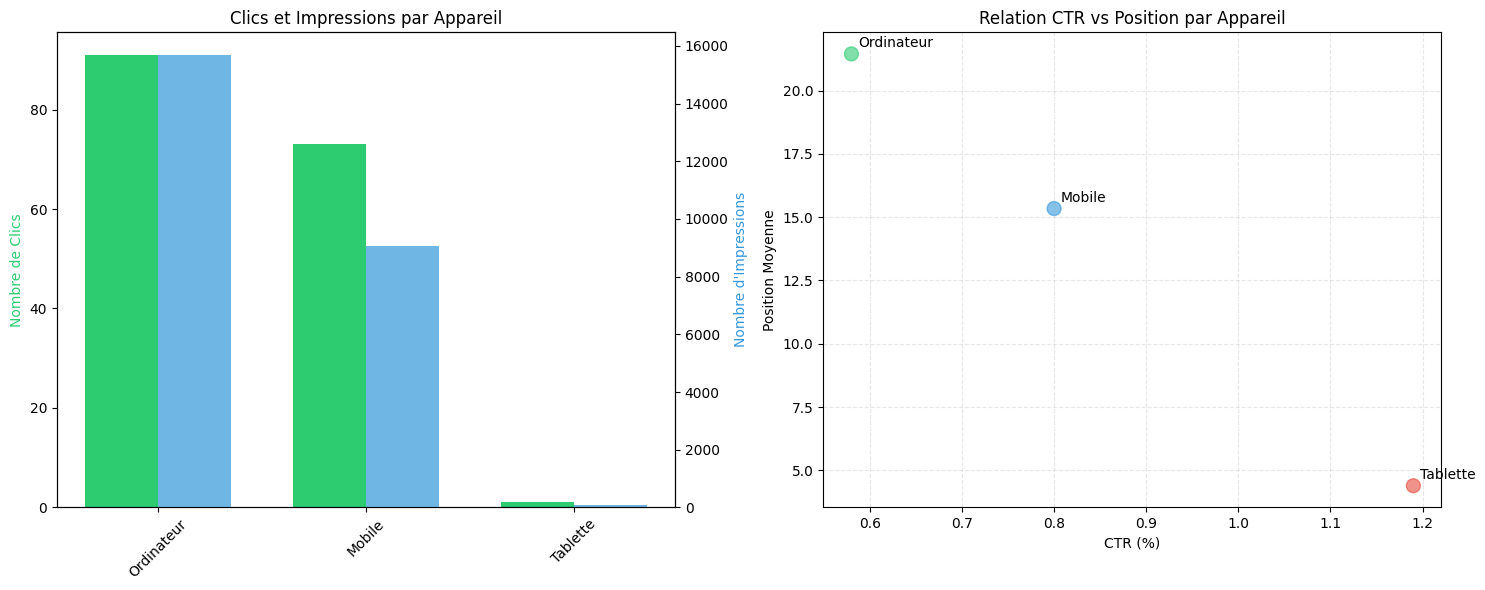

In [29]:
# Configuration matplotlib pour le français
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False

def clean_percentage(value):
    """Convertit les pourcentages en format string vers des floats"""
    if isinstance(value, str) and '%' in value:
        return float(value.strip('%').replace(',', '.'))
    return value

def clean_numeric(value):
    """Nettoie les valeurs numériques avec virgules"""
    if isinstance(value, str):
        return float(value.replace(',', ''))
    return value

class SEOFileAnalyzer:
    def __init__(self):
        self.colors = ['#2ecc71', '#3498db', '#e74c3c', '#f1c40f', '#9b59b6']
        
    def analyze_device_data(self, df):
        """Analyse des données par appareil"""
        # Nettoyage des données
        df['CTR'] = df['CTR'].apply(clean_percentage)
        df['Impressions'] = df['Impressions'].apply(clean_numeric)
        
        # Création de la visualisation
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Graphique des clics et impressions
        width = 0.35
        x = np.arange(len(df['Appareil']))
        
        ax1.bar(x - width/2, df['Clics'], width, label='Clics', color=self.colors[0])
        ax1.set_ylabel('Nombre de Clics', color=self.colors[0])
        
        ax1_twin = ax1.twinx()
        ax1_twin.bar(x + width/2, df['Impressions'], width, label='Impressions',
                    color=self.colors[1], alpha=0.7)
        ax1_twin.set_ylabel('Nombre d\'Impressions', color=self.colors[1])
        
        ax1.set_xticks(x)
        ax1.set_xticklabels(df['Appareil'], rotation=45)
        ax1.set_title('Clics et Impressions par Appareil')
        
        # Graphique du CTR et de la Position
        ax2.scatter(df['CTR'], df['Position'], s=100, alpha=0.6,
                   c=[self.colors[i] for i in range(len(df))])
        
        for i, txt in enumerate(df['Appareil']):
            ax2.annotate(txt, (df['CTR'].iloc[i], df['Position'].iloc[i]),
                        xytext=(5, 5), textcoords='offset points')
        
        ax2.set_xlabel('CTR (%)')
        ax2.set_ylabel('Position Moyenne')
        ax2.set_title('Relation CTR vs Position par Appareil')
        ax2.grid(True, linestyle='--', alpha=0.3)
        
        plt.tight_layout()
        return fig
        
    def analyze_appearance_data(self, df):
        """Analyse des données d'apparence"""
        df['CTR'] = df['CTR'].apply(clean_percentage)
        df['Impressions'] = df['Impressions'].apply(clean_numeric)
        
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Création d'un graphique à bulles
        scatter = ax.scatter(df['Position'], df['CTR'],
                           s=df['Impressions']/10, # Taille proportionnelle aux impressions
                           alpha=0.6,
                           c=[self.colors[i] for i in range(len(df))])
        
        # Ajout des labels
        for i, row in df.iterrows():
            ax.annotate(row['Apparence dans les résultats de recherche'],
                       (row['Position'], row['CTR']),
                       xytext=(5, 5), textcoords='offset points')
        
        ax.set_xlabel('Position Moyenne')
        ax.set_ylabel('CTR (%)')
        ax.set_title('Analyse des Types d\'Apparence\n(taille des bulles proportionnelle aux impressions)')
        ax.grid(True, linestyle='--', alpha=0.3)
        
        plt.tight_layout()
        return fig
        
    def analyze_date_data(self, df):
        """Analyse des données temporelles"""
        df['Date'] = pd.to_datetime(df['Date'])
        df['CTR'] = df['CTR'].apply(clean_percentage)
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # Évolution des clics et impressions
        ax1.plot(df['Date'], df['Clics'], 'o-', color=self.colors[0], label='Clics')
        ax1_twin = ax1.twinx()
        ax1_twin.plot(df['Date'], df['Impressions'], 'o-', color=self.colors[1],
                     label='Impressions')
        
        ax1.set_ylabel('Nombre de Clics', color=self.colors[0])
        ax1_twin.set_ylabel('Nombre d\'Impressions', color=self.colors[1])
        ax1.set_title('Évolution des Clics et Impressions dans le Temps')
        
        # Évolution du CTR et de la Position
        ax2.plot(df['Date'], df['CTR'], 'o-', color=self.colors[2], label='CTR')
        ax2_twin = ax2.twinx()
        ax2_twin.plot(df['Date'], df['Position'], 'o-', color=self.colors[3],
                     label='Position')
        
        ax2.set_ylabel('CTR (%)', color=self.colors[2])
        ax2_twin.set_ylabel('Position', color=self.colors[3])
        ax2.set_title('Évolution du CTR et de la Position dans le Temps')
        
        for ax in [ax1, ax2]:
            ax.grid(True, linestyle='--', alpha=0.3)
        
        plt.tight_layout()
        return fig
        
    def analyze_page_data(self, df):
        """Analyse des données par page"""
        df['CTR'] = df['CTR'].apply(clean_percentage)
        df['Impressions'] = df['Impressions'].apply(clean_numeric)
        
        # Calcul du score d'efficacité
        df['Efficacité'] = df['Clics'] * (1 / df['Position'])
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # Graphique des métriques principales
        x = np.arange(len(df))
        width = 0.35
        
        ax1.bar(x - width/2, df['Clics'], width, label='Clics', color=self.colors[0])
        ax1_twin = ax1.twinx()
        ax1_twin.bar(x + width/2, df['CTR'], width, label='CTR (%)',
                    color=self.colors[1])
        
        ax1.set_xticks(x)
        ax1.set_xticklabels([f'Page {i+1}' for i in range(len(df))], rotation=45)
        ax1.set_ylabel('Nombre de Clics', color=self.colors[0])
        ax1_twin.set_ylabel('CTR (%)', color=self.colors[1])
        ax1.set_title('Performance des Pages')
        
        # Graphique de l'efficacité
        ax2.bar(x, df['Efficacité'], color=self.colors[2])
        ax2.set_xticks(x)
        ax2.set_xticklabels(df.index, rotation=45)
        ax2.set_ylabel('Score d\'Efficacité')
        ax2.set_title('Score d\'Efficacité des Pages\n(Clics pondérés par la Position)')
        
        plt.tight_layout()
        return fig

def generate_file_report(file_type, df):
    """Génère un rapport détaillé pour chaque type de fichier"""
    report = f"""
Rapport d'Analyse - {file_type}

1. Métriques Globales
---------------------
Nombre total de clics: {df['Clics'].sum()}
Nombre total d'impressions: {df['Impressions'].apply(clean_numeric).sum()}
CTR moyen: {df['CTR'].apply(clean_percentage).mean():.2f}%
Position moyenne: {df['Position'].mean():.2f}

2. Points Clés
-------------
"""
    
    if file_type == "Appareils":
        best_device = df.loc[df['CTR'].apply(clean_percentage).idxmax()]
        report += f"""
- Meilleur appareil: {best_device['Appareil']}
  CTR: {clean_percentage(best_device['CTR']):.2f}%
  Position: {best_device['Position']:.2f}
- Distribution des clics: {', '.join(f"{device}: {clics} clics" for device, clics in zip(df['Appareil'], df['Clics']))}
"""
    
    elif file_type == "Apparence":
        best_appearance = df.loc[df['CTR'].apply(clean_percentage).idxmax()]
        report += f"""
- Meilleure apparence: {best_appearance['Apparence dans les résultats de recherche']}
  CTR: {clean_percentage(best_appearance['CTR']):.2f}%
  Position: {best_appearance['Position']:.2f}
- Impact de la position: La corrélation entre position et CTR est de {df['Position'].corr(df['CTR'].apply(clean_percentage)):.2f}
"""
    
    elif file_type == "Pages":
        best_page = df.loc[df['Clics'].idxmax()]
        report += f"""
- Page la plus performante: Page {best_page.name + 1}
  Clics: {best_page['Clics']}
  CTR: {clean_percentage(best_page['CTR']):.2f}%
  Position: {best_page['Position']:.2f}
- Répartition du trafic: {df['Clics'].sum()} clics totaux répartis sur {len(df)} pages
"""
    
    elif file_type == "Date":
        trend = df['Clics'].diff().mean()
        report += f"""
- Tendance des clics: {'↑' if trend > 0 else '↓'} {abs(trend):.2f} clics par jour
- Meilleur jour: {df.loc[df['Clics'].idxmax(), 'Date'].strftime('%Y-%m-%d')}
  ({df['Clics'].max()} clics)
- Évolution de la position: {df['Position'].diff().mean():.2f} points par jour
"""
    
    return report

# Exemple d'utilisation
analyzer = SEOFileAnalyzer()

# Définition des données pour chaque fichier
device_df = pd.DataFrame({
    'Appareil': ['Ordinateur', 'Mobile', 'Tablette'],
    'Clics': [91, 73, 1],
    'Impressions': ['15,689', '9,077', '84'],
    'CTR': ['0.58%', '0.8%', '1.19%'],
    'Position': [21.45, 15.34, 4.39]
})

# Analyse des données par appareil
device_fig = analyzer.analyze_device_data(device_df)
device_report = generate_file_report("Appareils", device_df)

print(device_report)